###  print out structures

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mycrograd.engine import Value
from mycrograd.nn import Neuron, Layer, MLP
from drawviz import draw_dot
np.random.seed(1337)
random.seed(1337)

#### Value

Value(data=4.5, grad=0)


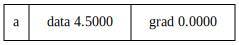

In [3]:
a=Value(4.5,label='a')
print(a)
draw_dot(a)

#### Neuron

number of inputs:  1
Neuron:  ReLUNeuron(1)
weights:  [Value(data=0.5808552090645627, grad=0)]
b:  Value(data=0, grad=0)
b label:  b
number of parameters  2
[Value(data=0.5808552090645627, grad=0), Value(data=0, grad=0)]
inputs  [2]
activation:  Value(data=1.1617104181291253, grad=0)


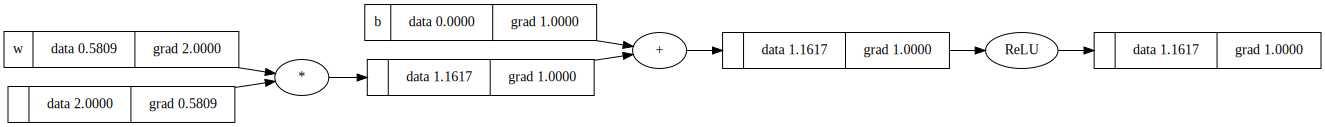

In [13]:
nin=1  #number of inputs
myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b label: ",myNeuron.b.label)

print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())
# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
print("activation: ",myNeuron(xi))
loss=myNeuron(xi)
loss.backward()
draw_dot(loss)



#### Layer

In [5]:
nin=3  #number of inputs
myLayer=Layer(nin,1)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)



Layer:  Layer of [ReLUNeuron(3)]
Neurons:  [ReLUNeuron(3)]


#### Multi Layer Perceptron

In [6]:
# initialize a model 
nin=3  #number of inputs
model = MLP(3, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
print("activation: ",model(xi))


MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41
inputs  [8 3 3]
activation:  Value(data=-4.0028496219256064, grad=0)


## Gradient

[Value(data=0.09921848842252134, grad=0), Value(data=0, grad=0)]
weights:  [Value(data=0.09921848842252134, grad=0)]
[Value(data=0.5519936528601597, grad=0), Value(data=0, grad=0)]
loss= Value(data=0.054767975855611016, grad=0)


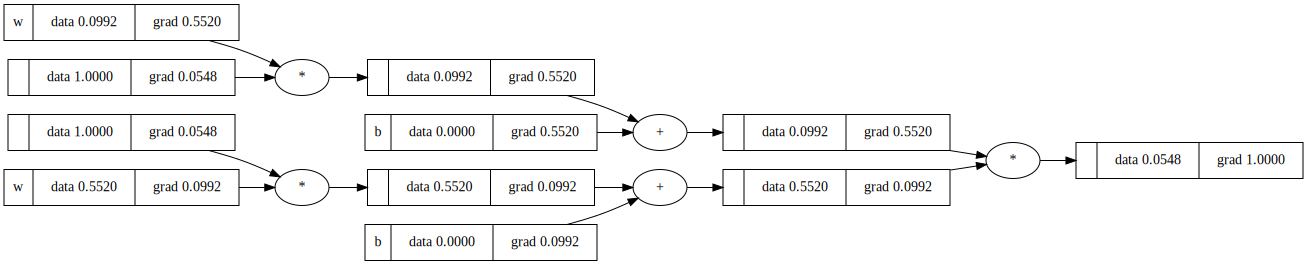

In [14]:
myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("loss=",loss)

draw_dot(loss)
loss.backward()
draw_dot(loss)
